# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import random
import yfinance as yf
import scipy.stats as stats

nse_symbols = pd.read_csv('MW-NIFTY-50-03-Jun-2025.csv')  # Make sure this file contains the 'Symbol' column
nse_symbols.columns = nse_symbols.columns.str.replace(' \n','')

valid_tickers = []

for symbol in nse_symbols['SYMBOL']:
    ticker = symbol + ".NS"
    try:
        data = yf.Ticker(ticker).history(period="365d")
        if not data.empty:
            valid_tickers.append(ticker)
    except:
        pass

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(valid_tickers, start = start_date, end =end_date)


$NIFTY 50.NS: possibly delisted; no price data found  (period=365d) (Yahoo error = "No data found, symbol may be delisted")
[*********************100%***********************]  50 of 50 completed


In [14]:
close = stock['Close']
normalized_returns = close/close.iloc[0]-1
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])
stock = pd.concat([stock, normalized_returns], axis =1 )
stock.head()

Close                                                        \
Ticker      ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                                            
2023-06-26  2292.356689    713.019592   5008.361328   3235.292725  958.830811   
2023-06-27  2281.222168    708.934753   5113.609375   3252.749756  971.508057   
2023-06-28  2398.606445    744.615295   5097.799805   3274.509766  976.449280   
2023-06-30  2384.676025    727.636230   5069.263184   3288.006104  985.682678   
2023-07-03  2382.129639    725.815308   5039.731445   3284.729736  980.342163   

                                                                  \
Ticker     BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS      BEL.NS   
Date                                                               
2023-06-26   4324.509766   1505.805908    689.175049  118.976395   
2023-06-27   4334.976562   1521.188110    691.198669  116.036285   
2023-06-28   4427.204102   1517.092773    698.185242  118.339363   
2023-06-30   4538.699219   1527.036621    708.113831  123.239548   
2023-07-03   4460.435059   1539.128906    725.162537  121.279472   

                          ... Cumulative Return                              \
Ticker     BHARTIARTL.NS  ...      SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS   
Date                      ...                                                 
2023-06-26    843.354675  ...          0.000000      0.000000      0.000000   
2023-06-27    856.174011  ...          0.006885     -0.009681      0.009245   
2023-06-28    863.400330  ...          0.026986     -0.008811      0.033107   
2023-06-30    869.884277  ...          0.056938     -0.001913      0.048780   
2023-07-03    870.280212  ...          0.037942     -0.004290      0.040416   

                                                                               \
Ticker     TATASTEEL.NS    TCS.NS  TECHM.NS  TITAN.NS  TRENT.NS ULTRACEMCO.NS   
Date                                                                            
2023-06-26     0.000000  0.000000  0.000000  0.000000  0.000000      0.000000   
2023-06-27     0.008193  0.002414  0.007015  0.001043 -0.006159      0.005069   
2023-06-28     0.015476  0.008089 -0.003418  0.018671  0.008924      0.011454   
2023-06-30     0.019572  0.035302  0.017043  0.025247  0.005988      0.015630   
2023-07-03     0.029586  0.025912  0.008589  0.022102 -0.001197      0.036329   

                      
Ticker      WIPRO.NS  
Date                  
2023-06-26  0.000000  
2023-06-27  0.004463  
2023-06-28  0.002100  
2023-06-30  0.021659  
2023-07-03  0.028091  

[5 rows x 300 columns]

**If the log_returns were normally distributed, so must be their frequencies. Let us plot those first for some chosen tickers.**


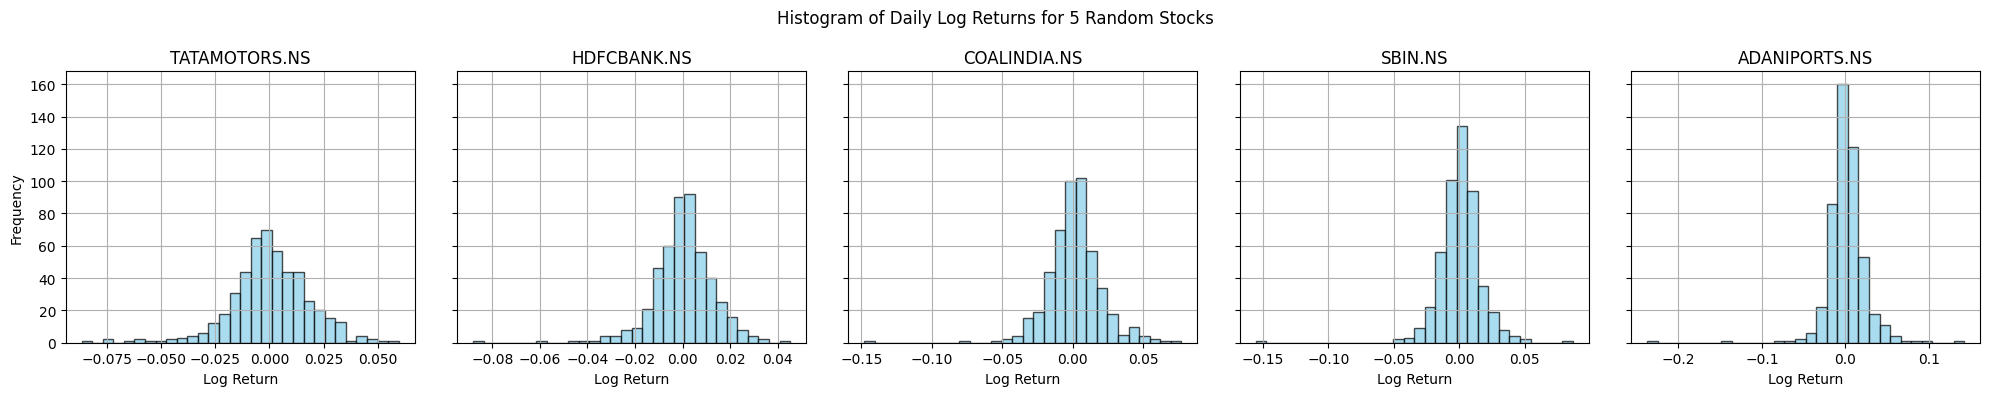

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# 1. Choose 5 random tickers
random_list = random.sample(valid_tickers, 5)

# 2. Extract close prices
close_prices = stock['Close'][random_list]

# 3. Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# 4. Plot histograms for each stock
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i, ticker in enumerate(random_list):
    axs[i].hist(log_returns[ticker], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_title(ticker)
    axs[i].set_xlabel('Log Return')
    axs[i].grid(True)

axs[0].set_ylabel('Frequency')
plt.suptitle('Histogram of Daily Log Returns for 5 Random Stocks')
plt.tight_layout()
plt.show()

**Now let us plot timeline of the log returns. Let us plot from one ticker only.**

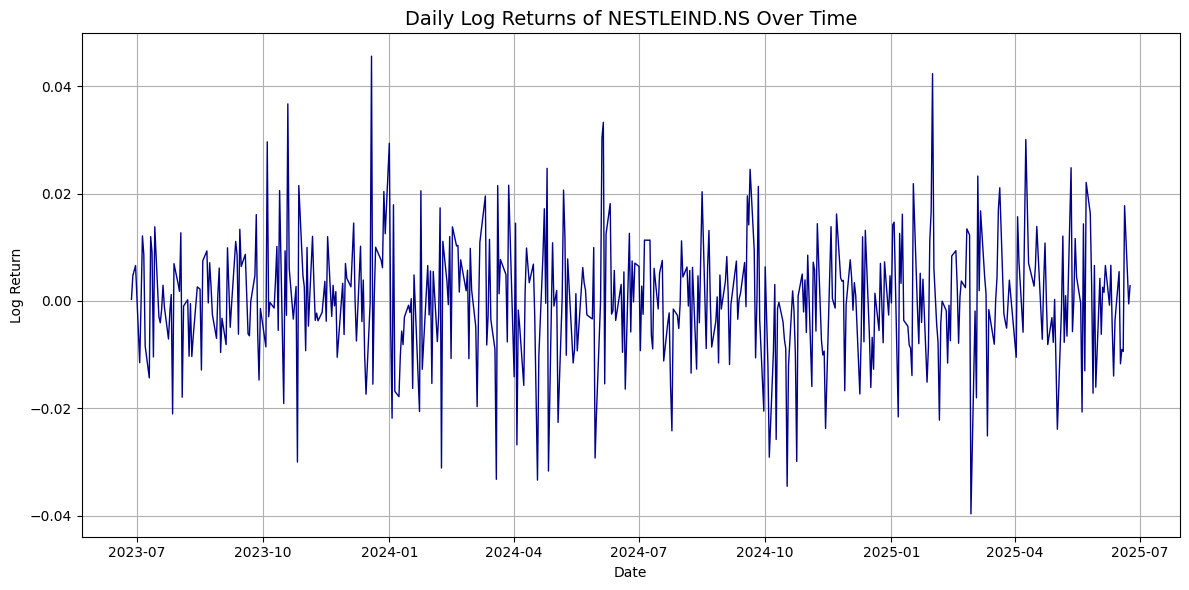

In [16]:
nestle_close = stock['Close']['NESTLEIND.NS']

# 2. Compute daily log returns
nestle_log_returns = np.log(nestle_close / nestle_close.shift(1)).dropna()

# 3. Plot
plt.figure(figsize=(12, 6))
plt.plot(nestle_log_returns.index, nestle_log_returns, color='darkblue', linewidth=1)

plt.title("Daily Log Returns of NESTLEIND.NS Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.tight_layout()
plt.show()

**This is not showing clear trends as the log_returns are very small and mean is expected to be 0. So, rather we should look at cumulative return.**

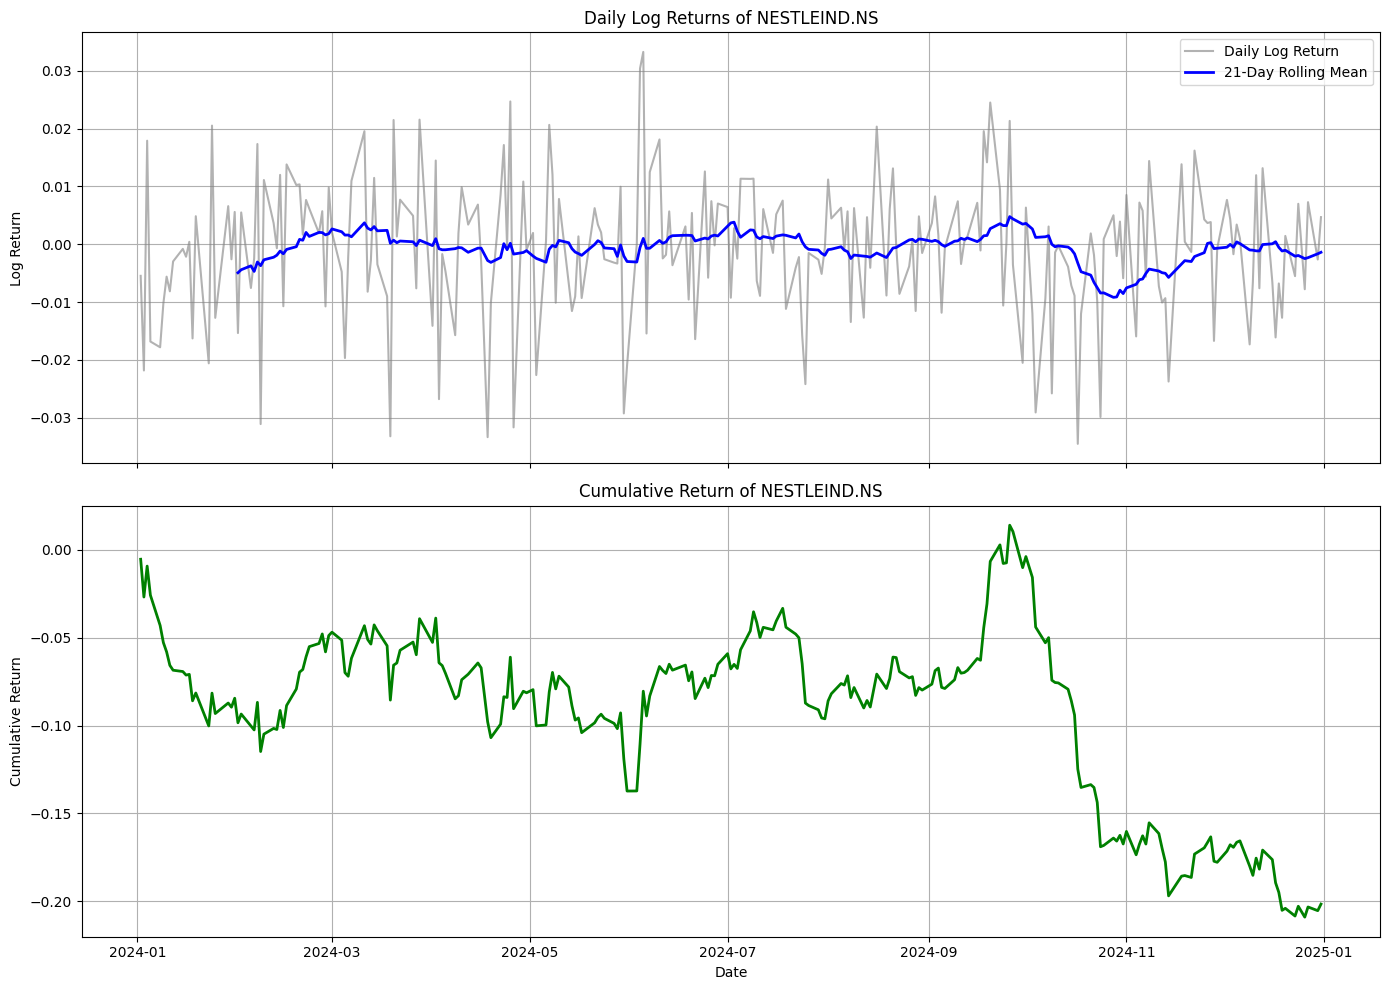

In [17]:
# 1. Extract closing prices for NESTLEIND

start_date = '2024-01-01'
end_date = '2024-12-31'

nestle_close_full = stock['Close']['NESTLEIND.NS']
nestle_close = nestle_close_full.loc[start_date:end_date]

# 2. Compute daily log returns
nestle_log_returns = np.log(nestle_close / nestle_close.shift(1)).dropna()

# 3. Compute rolling mean (21 trading days ≈ 1 month)
rolling_mean = nestle_log_returns.rolling(window=21).mean()

# 4. Compute cumulative return
cumulative_return = np.exp(nestle_log_returns.cumsum()) - 1

# 5. Plot
fig, ax1 = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Log returns and rolling mean
ax1[0].plot(nestle_log_returns.index, nestle_log_returns, label='Daily Log Return', color='gray', alpha=0.6)
ax1[0].plot(rolling_mean.index, rolling_mean, label='21-Day Rolling Mean', color='blue', linewidth=2)
ax1[0].set_title('Daily Log Returns of NESTLEIND.NS')
ax1[0].set_ylabel('Log Return')
ax1[0].legend()
ax1[0].grid(True)

# Plot 2: Cumulative Return
ax1[1].plot(cumulative_return.index, cumulative_return, color='green', linewidth=2)
ax1[1].set_title('Cumulative Return of NESTLEIND.NS')
ax1[1].set_xlabel('Date')
ax1[1].set_ylabel('Cumulative Return')
ax1[1].grid(True)

plt.tight_layout()
plt.show()

**Now let us do normality test on our data for Nestle & HDFCBANK. First let's put probability plot.**

In [25]:
nestle_log_returns_values= nestle_log_returns.values

hdfc_close_full = stock['Close']['HDFCBANK.NS']
hdfc_close = hdfc_close_full.loc[start_date:end_date]
hdfc_log_returns = np.log(hdfc_close / hdfc_close.shift(1)).dropna()

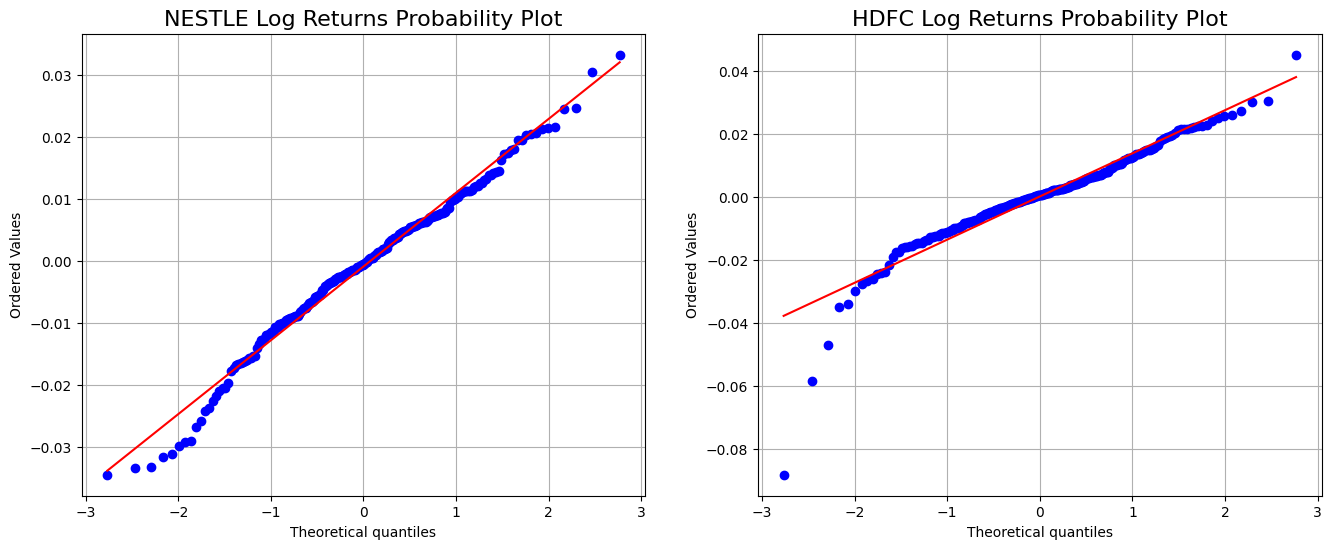

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Nestle log returns
stats.probplot(nestle_log_returns_values, dist="norm", plot=axes[0])
axes[0].set_title("NESTLE Log Returns Probability Plot", fontsize=16)
axes[0].grid(True)

# Plot HDFC log returns
stats.probplot(hdfc_log_returns, dist="norm", plot=axes[1])
axes[1].set_title("HDFC Log Returns Probability Plot", fontsize=16)
axes[1].grid(True)

plt.show()

In [31]:
#Collect p-values of normality tests
p_nestle=stats.normaltest(nestle_log_returns_values)[1]
p_hdfc = stats.normaltest(hdfc_log_returns)[1]



#Print evidence/non-evidence of normality
print(f"Nestle log return distribution: p-value = {p_nestle:.4f}")
if p_nestle < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 


print(f"HDFC log return distribution: p-value = {p_hdfc:.4f}")
if p_hdfc < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

Nestle log return distribution: p-value = 0.0438
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
HDFC log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


**Let us try to see in what period it is normally distributed.**

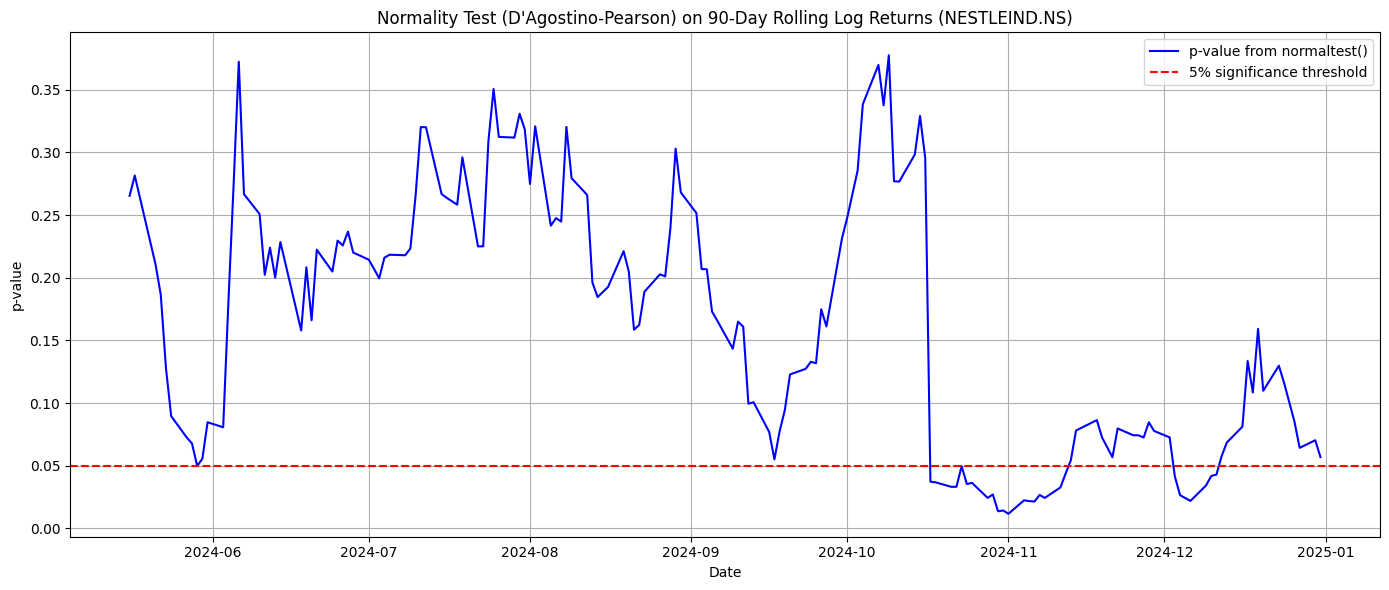

In [49]:
from scipy.stats import normaltest


window_size = 90
normal_pvals = []
end_dates = []
for i in range(len(nestle_log_returns) - window_size + 1):
    window_data = nestle_log_returns.iloc[i:i+window_size]
    stat, pval = normaltest(window_data)
    normal_pvals.append(pval)
    end_dates.append(nestle_log_returns.index[i + window_size - 1])  # mark end of window

# Step 4: Convert to DataFrame
pval_df = pd.DataFrame({'EndDate': end_dates, 'p_value': normal_pvals})
pval_df.set_index('EndDate', inplace=True)

# Step 5: Plot p-values over time
plt.figure(figsize=(14, 6))
plt.plot(pval_df.index, pval_df['p_value'], label='p-value from normaltest()', color='blue')
plt.axhline(0.05, color='red', linestyle='--', label='5% significance threshold')
plt.title('Normality Test (D\'Agostino-Pearson) on 90-Day Rolling Log Returns (NESTLEIND.NS)')
plt.xlabel('Date')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
normal_periods = pval_df[pval_df['p_value'] > 0.05]
print("Periods likely to be normal:")
print(normal_periods.tail())
selected_end_date = normal_periods.index[-1]
start_date = selected_end_date - pd.Timedelta(days=window_size)

normal_window = log_returns.loc[start_date:selected_end_date]

Periods likely to be normal:
             p_value
EndDate             
2024-12-24  0.116146
2024-12-26  0.085164
2024-12-27  0.064219
2024-12-30  0.070296
2024-12-31  0.056825


**this, we can see that from June to oct 2024, p-values are higher. Thus, if we perform normality test in that period, it should be satisfied.**

In [54]:

filtered_returns = nestle_log_returns.loc[start_date:end_date]

#Print evidence/non-evidence of normality
print(f"Nestle log return distribution: p-value = {p_nestle_period:.4f}")
if p_nestle_period < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 

Nestle log return distribution: p-value = 0.1093
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
